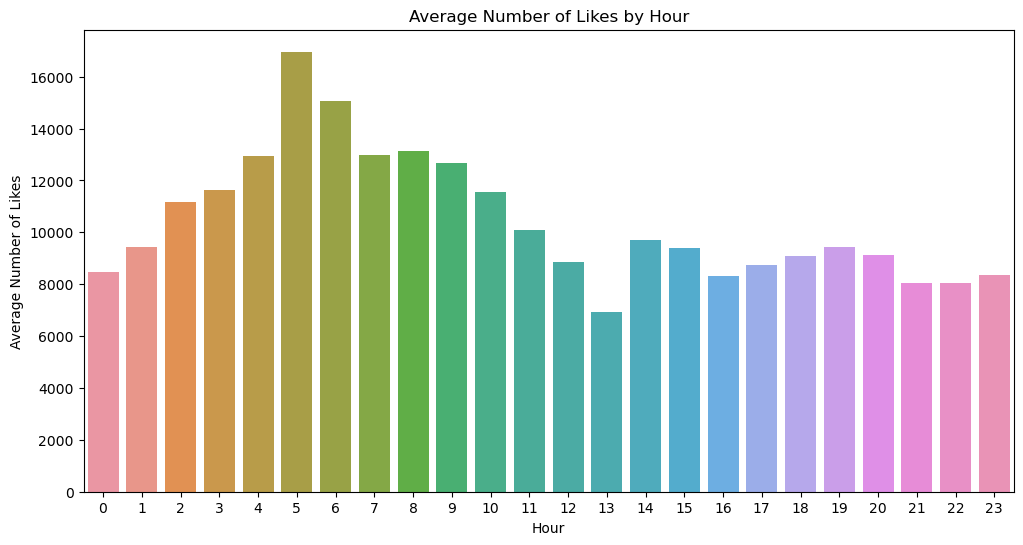

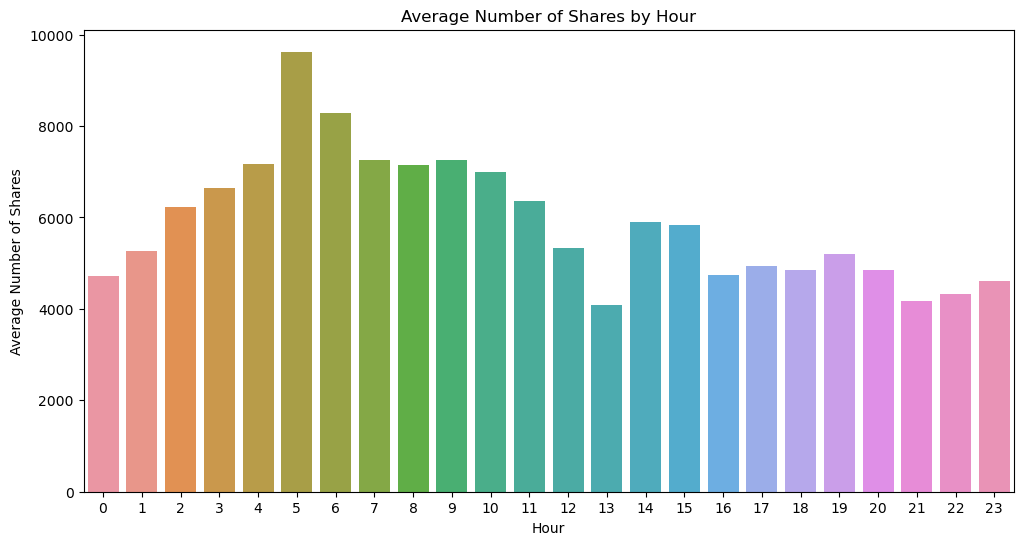

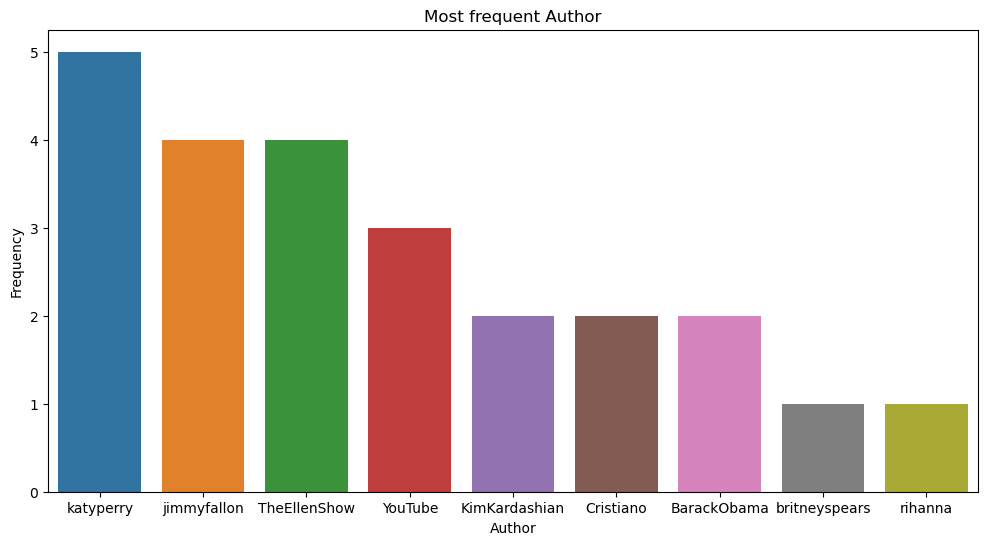

In [2]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import os
import numpy as np
import s3fs
import matplotlib.pyplot as plt
import seaborn as sns

def create_fs_for_s3():
    aws_access_key = ''
    aws_secret_key = ''
    bucket_name = 'twitterdata-analytics'
    fs = s3fs.S3FileSystem(anon=False, key=aws_access_key, secret=aws_secret_key)
    return (fs, bucket_name)

# Your existing functions here...

def visualize_hourly_data(hourly_df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='hour', y='number_of_likes', data=hourly_df)
    plt.title('Average Number of Likes by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average Number of Likes')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='hour', y='number_of_shares', data=hourly_df)
    plt.title('Average Number of Shares by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average Number of Shares')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='author', data=hourly_df, order=hourly_df['author'].value_counts().index)
    plt.title('Most frequent Author')
    plt.xlabel('Author')
    plt.ylabel('Frequency')
    plt.show()

def read_hourly_data_from_s3():
    fs, bucket_name = create_fs_for_s3()
    path = f's3://{bucket_name}/output_data/hourly_output.csv'
    with fs.open(path, 'rb') as f:
        hourly_df = pd.read_csv(f)
    return hourly_df

if __name__ == "__main__":
    hourly_tweet_df = read_hourly_data_from_s3()
    visualize_hourly_data(hourly_tweet_df)
